In [226]:
import pandas as pd
import math
import random
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklego.metrics import equal_opportunity_score
from sklego.metrics import p_percent_score
from sklearn.metrics import log_loss, accuracy_score
from sklearn.utils.extmath import squared_norm
import optuna, sklearn, sklearn.datasets

from moopt.scalarization_interface import scalar_interface, single_interface, w_interface
from moopt import monise

from fair_models import coefficient_of_variation, MOOLogisticRegression, FindCLogisticRegression, FindCCLogisticRegression
from fair_models import calc_reweight
from fair_models import FairScalarization, EqualScalarization
from fair_models import SimpleVoting

import plotly
import plotly.graph_objects as go
import matplotlib.pyplot as plt

import sys
sys.path.append("./MMFP/")
from MMPF.MinimaxParetoFair.MMPF_trainer import SKLearn_Weighted_LLR, APSTAR

In [227]:
from sklego.linear_model import DemographicParityClassifier
from sklego.linear_model import EqualOpportunityClassifier
from sklearn.linear_model import LogisticRegression

In [228]:
# Minimax - Marrom, LogReg - Amarelo, Reweight - Verde, ParDem - Roxo, EqOP - Laranja
# MOErro - Azul, MooAcep - Vermelho
hist_color = {'Minimax': '#a65628', 'LogReg':'#f781bf', 'Reweight':'#4daf4a', 
                'ParDem': '#984ea3', 'EqOp': '#ff7f00', 'MOOErro': '#377eb8','MOOAcep': '#e41a1c'}
line_color = {'Minimax': '#c9997e', 'LogReg':'#f781bf', 'Reweight':'#94cf92', 
                'ParDem': '#c194c7', 'EqOp': '#ffb266', 'MOOErro': '#87b1d4','MOOAcep': '#f18c8d'}

# Dataset

In [640]:
#data = pd.read_csv("Datasets - Limpos/compas_onerace.csv")
#fair_feature = "not_white"
#pred_feature = "Two_yr_Recidivism"

data = pd.read_csv("Datasets - Limpos/german.csv")
fair_feature = "Sex"
pred_feature = "Risk"

#data = pd.read_csv("Datasets - Limpos/adult.csv")
#fair_feature = "race"
#pred_feature = "income"

In [641]:
categories_fair_class = []

for index, row in data.iterrows():
    if row[pred_feature] == -1:
        categories_fair_class.append(row[fair_feature])
    else:
        categories_fair_class.append(row[fair_feature]+2)

In [642]:
random_gen = random.randint(0, 1000)
#random_gen = 262
print(random_gen)

540


In [643]:
X = data.drop([pred_feature], axis=1)
y = data[pred_feature]

X_tv, X_test, y_tv, y_test = train_test_split(X, y, test_size=int(data.shape[0]*0.2),stratify=categories_fair_class,
                                             random_state=random_gen)

ads = [categories_fair_class[i] for i in range(data.shape[0]) if i in X_tv.index.tolist()]
X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, test_size=int(data.shape[0]*0.2),
                                                  stratify=ads, random_state=random_gen)

In [644]:
other_solutions_list = {'Minimax': [], 'LogReg':[], 'Reweight':[], 'ParDem':[], 'EqOp':[]}

# Experimento 1 - Diversidade

## Modelo 1) Fair Moo - Erro por grupo

In [645]:
moo_err = monise(weightedScalar=FairScalarization(X_train, y_train, fair_feature),
                 singleScalar=FairScalarization(X_train, y_train, fair_feature),
                  nodeTimeLimit=2, targetSize=150,
                  targetGap=0, nodeGap=0.05, norm=False)

moo_err.optimize()

2021-04-28 21:25:04,871 - moopt.monise - DEBUG: Finding 1th individual minima
2021-04-28 21:25:04,903 - moopt.monise - DEBUG: Finding 2th individual minima
2021-04-28 21:25:04,980 - moopt.monise - DEBUG: Finding 3th individual minima
2021-04-28 21:25:05,012 - moopt.monise - DEBUG: 4th solution - importance: 1.0
2021-04-28 21:25:05,059 - moopt.monise - DEBUG: 5th solution - importance: 1.0
2021-04-28 21:25:05,108 - moopt.monise - DEBUG: 6th solution - importance: 1.0
2021-04-28 21:25:05,174 - moopt.monise - DEBUG: 7th solution - importance: 1.0
2021-04-28 21:25:05,265 - moopt.monise - DEBUG: 8th solution - importance: 1.0
2021-04-28 21:25:05,331 - moopt.monise - DEBUG: 9th solution - importance: 0.51294611533535
2021-04-28 21:25:05,403 - moopt.monise - DEBUG: 10th solution - importance: 0.3280393314718991
2021-04-28 21:25:05,498 - moopt.monise - DEBUG: 11th solution - importance: 0.27440320249106537
2021-04-28 21:25:05,570 - moopt.monise - DEBUG: 12th solution - importance: 0.2303436634

2021-04-28 21:25:47,947 - moopt.monise - DEBUG: 87th solution - importance: 0.0026735125661015726
2021-04-28 21:25:49,846 - moopt.monise - DEBUG: 88th solution - importance: 0.0026125156627140396
2021-04-28 21:25:51,746 - moopt.monise - DEBUG: 89th solution - importance: 0.002606253207920187
2021-04-28 21:25:53,602 - moopt.monise - DEBUG: 90th solution - importance: 0.0025761624343985856
2021-04-28 21:25:55,447 - moopt.monise - DEBUG: 91th solution - importance: 0.0025571489741493267
2021-04-28 21:25:57,558 - moopt.monise - DEBUG: 92th solution - importance: 0.00254520495524217
2021-04-28 21:25:59,517 - moopt.monise - DEBUG: 93th solution - importance: 0.002520099004158309
2021-04-28 21:26:01,648 - moopt.monise - DEBUG: 94th solution - importance: 0.002508081720575147
2021-04-28 21:26:03,797 - moopt.monise - DEBUG: 95th solution - importance: 0.002441475339138369
2021-04-28 21:26:05,908 - moopt.monise - DEBUG: 96th solution - importance: 0.0024193964750404712
2021-04-28 21:26:08,014 - 

In [646]:
m_aux = {"Acurácia": [], "Igualdade de Oportunidade": [], "P porcento": [], "Coeficiente de variação": []}
sols = []

for solution in moo_err.solutionsList:
    sols.append(solution.x)
    m_aux["Acurácia"].append(solution.x.score(X_val, y_val))
    m_aux["Igualdade de Oportunidade"].append(equal_opportunity_score(sensitive_column=fair_feature)(solution.x,
                                                                                                            X_val, y_val))
    m_aux["P porcento"].append(p_percent_score(sensitive_column=fair_feature)(solution.x,X_val))
    m_aux["Coeficiente de variação"].append(coefficient_of_variation(solution.x, X_val, y_val))

/root/anaconda3/envs/py36/lib/python3.6/site-packages/sklego/metrics.py:155: RuntimeWarning:

invalid value encountered in double_scalars

/root/anaconda3/envs/py36/lib/python3.6/site-packages/sklego/metrics.py:79: RuntimeWarning:

No samples with y_hat == 1 for Sex == 1, returning 0



In [647]:
m_metrics = pd.DataFrame(data=m_aux, columns=['Acurácia','Igualdade de Oportunidade','P porcento',
                                     'Coeficiente de variação'])

## Modelo 2) Equal - Aceitação por grupo

In [648]:
moo_prob = monise(weightedScalar=EqualScalarization(X_train, y_train, fair_feature),
             singleScalar=EqualScalarization(X_train, y_train, fair_feature),
              nodeTimeLimit=2, targetSize=150,
              targetGap=0, nodeGap=0.01, norm=False)

moo_prob.optimize()

2021-04-28 21:28:05,073 - moopt.monise - DEBUG: Finding 1th individual minima
2021-04-28 21:28:05,111 - moopt.monise - DEBUG: Finding 2th individual minima
2021-04-28 21:28:05,124 - moopt.monise - DEBUG: Finding 3th individual minima
2021-04-28 21:28:05,136 - moopt.monise - DEBUG: Finding 4th individual minima
2021-04-28 21:28:05,204 - moopt.monise - DEBUG: 5th solution - importance: 1.0
2021-04-28 21:28:05,278 - moopt.monise - DEBUG: 6th solution - importance: 1.0
2021-04-28 21:28:05,354 - moopt.monise - DEBUG: 7th solution - importance: 1.0
2021-04-28 21:28:05,417 - moopt.monise - DEBUG: 8th solution - importance: 1.0
2021-04-28 21:28:05,503 - moopt.monise - DEBUG: 9th solution - importance: 1.0
2021-04-28 21:28:05,588 - moopt.monise - DEBUG: 10th solution - importance: 0.6341021841492428
2021-04-28 21:28:05,677 - moopt.monise - DEBUG: 11th solution - importance: 0.5177629429681977
2021-04-28 21:28:05,792 - moopt.monise - DEBUG: 12th solution - importance: 0.4289824045674671
2021-04-

2021-04-28 21:29:11,512 - moopt.monise - DEBUG: 87th solution - importance: 0.009629417150114462
2021-04-28 21:29:13,649 - moopt.monise - DEBUG: 88th solution - importance: 0.009599530201369064
2021-04-28 21:29:15,771 - moopt.monise - DEBUG: 89th solution - importance: 0.00959572537134799
2021-04-28 21:29:17,901 - moopt.monise - DEBUG: 90th solution - importance: 0.009459182840617567
2021-04-28 21:29:20,041 - moopt.monise - DEBUG: 91th solution - importance: 0.009396764132873566
2021-04-28 21:29:22,178 - moopt.monise - DEBUG: 92th solution - importance: 0.009217547987619718
2021-04-28 21:29:24,286 - moopt.monise - DEBUG: 93th solution - importance: 0.00908664566846782
2021-04-28 21:29:26,411 - moopt.monise - DEBUG: 94th solution - importance: 0.00908664566846782
2021-04-28 21:29:28,530 - moopt.monise - DEBUG: 95th solution - importance: 0.008983004191028897
2021-04-28 21:29:30,723 - moopt.monise - DEBUG: 96th solution - importance: 0.00892286482910768
2021-04-28 21:29:32,857 - moopt.mo

In [649]:
sols = []

m_aux2 = {"Acurácia": [], "Igualdade de Oportunidade": [], "P porcento": [], "Coeficiente de variação": []}
for solution in moo_prob.solutionsList:
    sols.append(solution.x)
    m_aux2["Acurácia"].append(solution.x.score(X_test, y_test))
    m_aux2["Igualdade de Oportunidade"].append(equal_opportunity_score(sensitive_column=fair_feature)(solution.x,
                                                                                                            X_test, y_test))
    m_aux2["P porcento"].append(p_percent_score(sensitive_column=fair_feature)(solution.x,X_test))
    m_aux2["Coeficiente de variação"].append(coefficient_of_variation(solution.x, X_test, y_test))

/root/anaconda3/envs/py36/lib/python3.6/site-packages/sklego/metrics.py:155: RuntimeWarning:

invalid value encountered in double_scalars

/root/anaconda3/envs/py36/lib/python3.6/site-packages/sklego/metrics.py:79: RuntimeWarning:

No samples with y_hat == 1 for Sex == 1, returning 0



In [650]:
m_metrics2 = pd.DataFrame(data=m_aux2, columns=['Acurácia','Igualdade de Oportunidade','P porcento',
                                     'Coeficiente de variação'])

## Modelo 3) Minimax

In [651]:
other_models = {"Acurácia": [], "Igualdade de Oportunidade": [], "P porcento": [], "Coeficiente de variação": [],
                "Modelo": [], "model_id": []}

In [652]:
C_values = np.logspace(-10, 10, 150)

a_train = X_train[fair_feature].copy().astype('int')
a_val = X_val[fair_feature].copy().astype('int')

a_train[a_train==0] = -1
a_val[a_val==0] = -1


metrics_adult_min_aux = {"Acurácia": [], "Igualdade de Oportunidade": [], "P porcento": [], "Coeficiente de variação": []}

idx = 0
for C in C_values:
    
    model = SKLearn_Weighted_LLR(X_train.values, y_train.values,
                 a_train.values, X_val.values,
                 y_val.values, a_val.values,
                 C_reg=C)

    mua_ini = np.ones(a_val.max() + 1)
    mua_ini /= mua_ini.sum()
    results = APSTAR(model, mua_ini, niter=200, max_patience=200, Kini=1,
                          Kmin=20, alpha=0.5, verbose=False)
    mu_best_list = results['mu_best_list']

    mu_best = mu_best_list[-1]
    model.weighted_fit(X_train.values, y_train.values, a_train.values, mu_best)
    
    other_solutions_list["Minimax"].append([idx, model])
    
    metrics_adult_min_aux["Acurácia"].append(accuracy_score(y_test, model.predict(X_test)))
    metrics_adult_min_aux["Igualdade de Oportunidade"].append(equal_opportunity_score(sensitive_column=fair_feature)(model,
                                                                                                            X_test, y_test))
    metrics_adult_min_aux["P porcento"].append(p_percent_score(sensitive_column=fair_feature)(model,X_test))
    metrics_adult_min_aux["Coeficiente de variação"].append(coefficient_of_variation(model, X_test, y_test))
    
    
    other_models["Acurácia"].append(accuracy_score(y_test, model.predict(X_test)))
    other_models["Igualdade de Oportunidade"].append(equal_opportunity_score(sensitive_column=fair_feature)(model,
                                                                                                            X_test, y_test))
    other_models["P porcento"].append(p_percent_score(sensitive_column=fair_feature)(model,X_test))
    other_models["Coeficiente de variação"].append(coefficient_of_variation(model, X_test, y_test))
    other_models["Modelo"].append("Minimax")
    other_models["model_id"].append(0)
    
    idx += 1

patience counter: 170 total iterations: 201
-----------------------------------------
patience counter: 170 total iterations: 201
-----------------------------------------
patience counter: 170 total iterations: 201
-----------------------------------------
patience counter: 170 total iterations: 201
-----------------------------------------
patience counter: 170 total iterations: 201
-----------------------------------------
patience counter: 170 total iterations: 201
-----------------------------------------
patience counter: 170 total iterations: 201
-----------------------------------------
patience counter: 170 total iterations: 201
-----------------------------------------
patience counter: 100 total iterations: 201
-----------------------------------------
patience counter: 194 total iterations: 201
-----------------------------------------
patience counter: 194 total iterations: 201
-----------------------------------------
patience counter: 154 total iterations: 201
----------

patience counter: 1 total iterations: 201
-----------------------------------------
patience counter: 8 total iterations: 201
-----------------------------------------
patience counter: 4 total iterations: 201
-----------------------------------------
patience counter: 0 total iterations: 201
-----------------------------------------
patience counter: 44 total iterations: 201
-----------------------------------------
patience counter: 54 total iterations: 201
-----------------------------------------
patience counter: 56 total iterations: 201
-----------------------------------------
patience counter: 58 total iterations: 201
-----------------------------------------
patience counter: 58 total iterations: 201
-----------------------------------------
patience counter: 58 total iterations: 201
-----------------------------------------
patience counter: 58 total iterations: 201
-----------------------------------------
patience counter: 58 total iterations: 201
--------------------------

## Modelo 4) Logistic regression

In [653]:
C_values = np.logspace(-10, 10, 150)

metrics_adult_log_aux = {"Acurácia": [], "Igualdade de Oportunidade": [], "P porcento": [], "Coeficiente de variação": []}

idx = 0
for C in C_values:
    model = LogisticRegression(C=C, max_iter=10**3, tol=10**-6)
    model.fit(X_train, y_train)
    
    other_solutions_list["LogReg"].append([idx, model])
    
    metrics_adult_log_aux["Acurácia"].append(model.score(X_test, y_test))
    metrics_adult_log_aux["Igualdade de Oportunidade"].append(equal_opportunity_score(sensitive_column=fair_feature)(model,
                                                                                                            X_test, y_test))
    metrics_adult_log_aux["P porcento"].append(p_percent_score(sensitive_column=fair_feature)(model,X_test))
    metrics_adult_log_aux["Coeficiente de variação"].append(coefficient_of_variation(model, X_test, y_test))
    
    other_models["Acurácia"].append(accuracy_score(y_test, model.predict(X_test)))
    other_models["Igualdade de Oportunidade"].append(equal_opportunity_score(sensitive_column=fair_feature)(model,
                                                                                                            X_test, y_test))
    other_models["P porcento"].append(p_percent_score(sensitive_column=fair_feature)(model,X_test))
    other_models["Coeficiente de variação"].append(coefficient_of_variation(model, X_test, y_test))
    other_models["Modelo"].append("LogReg")
    other_models["model_id"].append(1)
    
    idx += 1

/root/anaconda3/envs/py36/lib/python3.6/site-packages/sklego/metrics.py:155: RuntimeWarning:

invalid value encountered in double_scalars

/root/anaconda3/envs/py36/lib/python3.6/site-packages/sklego/metrics.py:79: RuntimeWarning:

No samples with y_hat == 1 for Sex == 1, returning 0

/root/anaconda3/envs/py36/lib/python3.6/site-packages/sklego/metrics.py:155: RuntimeWarning:

invalid value encountered in double_scalars

/root/anaconda3/envs/py36/lib/python3.6/site-packages/sklego/metrics.py:79: RuntimeWarning:

No samples with y_hat == 1 for Sex == 1, returning 0

/root/anaconda3/envs/py36/lib/python3.6/site-packages/sklego/metrics.py:155: RuntimeWarning:

invalid value encountered in double_scalars

/root/anaconda3/envs/py36/lib/python3.6/site-packages/sklego/metrics.py:79: RuntimeWarning:

No samples with y_hat == 1 for Sex == 1, returning 0

/root/anaconda3/envs/py36/lib/python3.6/site-packages/sklego/metrics.py:155: RuntimeWarning:

invalid value encountered in double_scalars

/ro

## Modelo 5) Reweig

In [654]:
C_values = np.logspace(-10, 10, 150)

sample_weight = calc_reweight(X_train, y_train, fair_feature)

metrics_adult_rew_aux = {"Acurácia": [], "Igualdade de Oportunidade": [], "P porcento": [], "Coeficiente de variação": []}

idx = 0
for C in C_values:
    model = LogisticRegression(C=C, max_iter=10**3, tol=10**-6)
    model.fit(X_train, y_train,sample_weight=sample_weight)
    
    other_solutions_list["Reweight"].append([idx, model])
    
    metrics_adult_rew_aux["Acurácia"].append(model.score(X_test, y_test))
    metrics_adult_rew_aux["Igualdade de Oportunidade"].append(equal_opportunity_score(sensitive_column=fair_feature)(model,
                                                                                                            X_test, y_test))
    metrics_adult_rew_aux["P porcento"].append(p_percent_score(sensitive_column=fair_feature)(model,X_test))
    metrics_adult_rew_aux["Coeficiente de variação"].append(coefficient_of_variation(model, X_test, y_test))
    
    other_models["Acurácia"].append(accuracy_score(y_test, model.predict(X_test)))
    other_models["Igualdade de Oportunidade"].append(equal_opportunity_score(sensitive_column=fair_feature)(model,
                                                                                                            X_test, y_test))
    other_models["P porcento"].append(p_percent_score(sensitive_column=fair_feature)(model,X_test))
    other_models["Coeficiente de variação"].append(coefficient_of_variation(model, X_test, y_test))
    other_models["Modelo"].append("Reweight")
    other_models["model_id"].append(2)
    
    idx += 1

/root/anaconda3/envs/py36/lib/python3.6/site-packages/sklego/metrics.py:155: RuntimeWarning:

invalid value encountered in double_scalars

/root/anaconda3/envs/py36/lib/python3.6/site-packages/sklego/metrics.py:79: RuntimeWarning:

No samples with y_hat == 1 for Sex == 1, returning 0

/root/anaconda3/envs/py36/lib/python3.6/site-packages/sklego/metrics.py:155: RuntimeWarning:

invalid value encountered in double_scalars

/root/anaconda3/envs/py36/lib/python3.6/site-packages/sklego/metrics.py:79: RuntimeWarning:

No samples with y_hat == 1 for Sex == 1, returning 0

/root/anaconda3/envs/py36/lib/python3.6/site-packages/sklego/metrics.py:155: RuntimeWarning:

invalid value encountered in double_scalars

/root/anaconda3/envs/py36/lib/python3.6/site-packages/sklego/metrics.py:79: RuntimeWarning:

No samples with y_hat == 1 for Sex == 1, returning 0

/root/anaconda3/envs/py36/lib/python3.6/site-packages/sklego/metrics.py:155: RuntimeWarning:

invalid value encountered in double_scalars

/ro

# Modelo 6) Paridade Demográfica

In [655]:
C_values = np.logspace(-5, 5, 12)
c_values = np.logspace(-5, 5, 12)

metrics_adult_pp_aux = {"Acurácia": [], "Igualdade de Oportunidade": [], "P porcento": [], "Coeficiente de variação": []}


idx = 0
for C in C_values:
    for c in c_values:
        try:
            model = DemographicParityClassifier(sensitive_cols=fair_feature,
                                            covariance_threshold=c, C=C, max_iter=10**3)
            model.fit(X_train, y_train)
        except:
            continue
            
        other_solutions_list["ParDem"].append([idx, model])
        
        metrics_adult_pp_aux["Acurácia"].append(model.score(X_test, y_test))
        metrics_adult_pp_aux["Igualdade de Oportunidade"].append(equal_opportunity_score(sensitive_column=fair_feature)(model,
                                                                                                                X_test, y_test))
        metrics_adult_pp_aux["P porcento"].append(p_percent_score(sensitive_column=fair_feature)(model,X_test))
        metrics_adult_pp_aux["Coeficiente de variação"].append(coefficient_of_variation(model, X_test, y_test))
        
        other_models["Acurácia"].append(accuracy_score(y_test, model.predict(X_test)))
        other_models["Igualdade de Oportunidade"].append(equal_opportunity_score(sensitive_column=fair_feature)(model,
                                                                                                                X_test, y_test))
        other_models["P porcento"].append(p_percent_score(sensitive_column=fair_feature)(model,X_test))
        other_models["Coeficiente de variação"].append(coefficient_of_variation(model, X_test, y_test))
        other_models["Modelo"].append("ParDem")
        other_models["model_id"].append(3)
        
        idx += 1

/root/anaconda3/envs/py36/lib/python3.6/site-packages/cvxpy/problems/problem.py:1055: UserWarning:

Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.

/root/anaconda3/envs/py36/lib/python3.6/site-packages/cvxpy/problems/problem.py:1055: UserWarning:

Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.

/root/anaconda3/envs/py36/lib/python3.6/site-packages/cvxpy/problems/problem.py:1055: UserWarning:

Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.

/root/anaconda3/envs/py36/lib/python3.6/site-packages/cvxpy/problems/problem.py:1055: UserWarning:

Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.

/root/anaconda3/envs/py36/lib/python3.6/site-packages/cvxpy/problems/problem.py:1055

## Modelo 7) Equal Oportunity

In [656]:
C_values = np.logspace(-5, 5, 12)
c_values = np.logspace(-5, 5, 12)

metrics_adult_eo_aux = {"Acurácia": [], "Igualdade de Oportunidade": [], "P porcento": [], "Coeficiente de variação": []}


idx = 0
for C in C_values:
    for c in c_values:
        model = EqualOpportunityClassifier(sensitive_cols=fair_feature, positive_target=True,
                                           covariance_threshold=c, C=C, max_iter=10**3)
        try:
            model.fit(X_train, y_train)
        except:
            continue
            
        other_solutions_list["EqOp"].append([idx, model])
            
        metrics_adult_eo_aux["Acurácia"].append(model.score(X_test, y_test))
        metrics_adult_eo_aux["Igualdade de Oportunidade"].append(equal_opportunity_score(sensitive_column=fair_feature)(model,
                                                                                                                X_test, y_test))
        metrics_adult_eo_aux["P porcento"].append(p_percent_score(sensitive_column=fair_feature)(model,X_test))
        metrics_adult_eo_aux["Coeficiente de variação"].append(coefficient_of_variation(model, X_test, y_test))
        
        other_models["Acurácia"].append(accuracy_score(y_test, model.predict(X_test)))
        other_models["Igualdade de Oportunidade"].append(equal_opportunity_score(sensitive_column=fair_feature)(model,
                                                                                                                X_test, y_test))
        other_models["P porcento"].append(p_percent_score(sensitive_column=fair_feature)(model,X_test))
        other_models["Coeficiente de variação"].append(coefficient_of_variation(model, X_test, y_test))
        other_models["Modelo"].append("EqOp")
        other_models["model_id"].append(4)
        
        idx += 1

/root/anaconda3/envs/py36/lib/python3.6/site-packages/cvxpy/problems/problem.py:1055: UserWarning:

Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.

/root/anaconda3/envs/py36/lib/python3.6/site-packages/cvxpy/problems/problem.py:1055: UserWarning:

Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.

/root/anaconda3/envs/py36/lib/python3.6/site-packages/cvxpy/problems/problem.py:1055: UserWarning:

Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.

/root/anaconda3/envs/py36/lib/python3.6/site-packages/cvxpy/problems/problem.py:1055: UserWarning:

Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.

/root/anaconda3/envs/py36/lib/python3.6/site-packages/cvxpy/problems/problem.py:1055

## Visualização - Modelos Comparados

In [657]:
all_models = pd.DataFrame(data=other_models, columns=['Acurácia','Igualdade de Oportunidade','P porcento',
                                     'Coeficiente de variação','model_id','Modelo'])

In [658]:
m_metrics['model_id'] = 5
m_metrics['Modelo'] = "MOOErro"

m_metrics2['model_id'] = 6
m_metrics2['Modelo'] = "MOOAcep"

In [659]:
all_models = all_models.append(m_metrics)
all_models = all_models.append(m_metrics2)

all_models = all_models.reset_index()

In [660]:
all_models['cv_norm'] = (all_models['Coeficiente de variação']-all_models['Coeficiente de variação'].max())/(all_models['Coeficiente de variação'].min()-all_models['Coeficiente de variação'].max())

In [661]:
lim_values = {}

for metric in ['Acurácia', 'Igualdade de Oportunidade', 'P porcento', 'cv_norm']:
    lim_values[metric] = {'min': math.floor(all_models[metric].min()*1000)/1000,
                          'max': math.ceil(all_models[metric].max()*1000)/1000}
    
lim_values['Coeficiente de variação'] = {'min': math.floor(all_models['Coeficiente de variação'].max()*1000)/1000,
                                        'max': math.ceil(all_models['Coeficiente de variação'].min()*1000)/1000}

In [662]:
lim_values

{'Acurácia': {'min': 0.394, 'max': 0.674},
 'Igualdade de Oportunidade': {'min': 0.0, 'max': 1.0},
 'P porcento': {'min': 0.0, 'max': 1.0},
 'cv_norm': {'min': 0.0, 'max': 1.0},
 'Coeficiente de variação': {'min': 1.753, 'max': 0.487}}

In [663]:
all_models['acc_norm'] = (all_models['Acurácia']-lim_values['Acurácia']['min'])/(lim_values['Acurácia']['max']-lim_values['Acurácia']['min'])
lim_values['acc_norm'] = {'min': 0.0, 'max': 1.0}

In [664]:
all_models['eo_norm'] = (all_models['Igualdade de Oportunidade']-lim_values['Igualdade de Oportunidade']['min'])/(lim_values['Igualdade de Oportunidade']['max']-lim_values['Igualdade de Oportunidade']['min'])
lim_values['eo_norm'] = {'min': 0.0, 'max': 1.0}

# Experimento 2 - Ensemble

In [665]:
metrics = ['Acurácia', 'Coeficiente de variação', 'Igualdade de Oportunidade', 'P porcento']
methods = ['Minimax', 'LogReg', 'Reweight', 'ParDem', 'EqOp', 'MOOErro','MOOAcep']
map_labels = {'Acc': 'Acurácia', 'CV': 'Coeficiente de variação', 'EO': 'Igualdade de Oportunidade',
               'DP': 'P porcento'}

In [666]:
colors = [hist_color['Minimax'],hist_color['LogReg'],hist_color['Reweight'],hist_color['ParDem'],
          hist_color['EqOp'],hist_color['MOOErro'],hist_color['MOOAcep']]

colormap = dict(zip(methods, colors))
methmap = dict(zip(methods, methods))

In [667]:
plt.rcParams.update({'font.size': 12})

In [668]:
class Radar(object):
    def __init__(self, figure, title, labels, rect=None):
        if rect is None:
            rect = [0.05, 0.05, 0.9, 0.9]

        self.n = len(title)
        self.angles = np.arange(0, 360, 360.0/self.n)+45

        self.axes = [figure.add_axes(rect, projection='polar', label='axes%d' % i) for i in range(self.n)]

        self.ax = self.axes[0]
        self.ax.set_thetagrids(self.angles, labels=title, fontsize=18)

        for ax in self.axes[1:]:
            ax.patch.set_visible(False)
            ax.grid(False)
            ax.xaxis.set_visible(False)

        for ax, angle, label in zip(self.axes, self.angles, labels):
            ax.set_rgrids(range(1, 6), angle=angle, labels=label)
            ax.spines['polar'].set_visible(False)
            ax.set_ylim(0, 5.5)

    def plot(self, values, *args, **kw):
        angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
        values = np.r_[values, values[0]]
        self.ax.plot(angle, values, *args, **kw)

In [669]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

def build_radar(df_table, steps=4, shift=1, include_legend=True, plot_name = 'aux.jpg', 
                acc_min=acc_min, acc_max=acc_max,eo_min=eo_min, eo_max=eo_max, 
                dp_min=dp_min, dp_max=dp_max, cv_min=cv_min, cv_max=cv_max):

    normz = pd.DataFrame(index=['min', 'max'], columns=metrics)
    for column in metrics:
        if column == 'Coeficiente de variação':
            #normz[column] = [df_table[column].max(), df_table[column].min()]
            normz[column] = [max(cv_min, df_table[column].max()), min(cv_max, df_table[column].min())]
        elif column == 'Acurácia':
            normz[column] = [min(acc_min, df_table[column].min()), max(acc_max, df_table[column].max())]
        elif column == 'Igualdade de Oportunidade':
            normz[column] = [min(eo_min, df_table[column].min()), max(eo_max, df_table[column].max())]
        elif column == 'P porcento':
            normz[column] = [min(dp_min, df_table[column].min()), max(dp_max, df_table[column].max())]
        else:
            #normz[column] = [df_table[column].min(), df_table[column].max()]
            normz[column] = [0,1]
    
    fig = plt.figure(figsize=(4, 4))

    tit = ['Acc', 'CV', 'EO', 'DP']

    lab = [ [normz[metric]['min'].round(2), '', '', '', normz[metric]['max'].round(2)]
           for metric in metrics
          ]

    radar = Radar(fig, tit, lab)
    for idx in df_table.index:
        line = steps*(df_table.loc[idx]-normz.loc['min'])/(normz.loc['max']-normz.loc['min'])+1
        #print(line)
        #selected =  all((line>=selection.loc['min'])&(line<=selection.loc['max']))
        #alpha = 0.8 if selected else 0.05
        color = colormap[idx]# if selected else 'white'
        radar.plot(line, lw=2, color=color)

    if include_legend:
        legend_elements = [Line2D([0], [0], color=colormap[meth], label=methmap[meth])
                          for meth in methods]

        leg2 = radar.ax.legend(handles=legend_elements, bbox_to_anchor=(0.95, 0.95), loc='upper left', title='Approach', 
                              fontsize = 12, title_fontsize=12)
        
        radar.ax.add_artist(leg2)
        
        fig.savefig(plot_name, bbox_extra_artists=(leg2,), bbox_inches='tight')
    else:
        fig.savefig(plot_name)

In [670]:
def calc_res_val(model__):
    return [accuracy_score(y_val, model__.predict(X_val)),
            coefficient_of_variation(model__, X_val, y_val),
            equal_opportunity_score(sensitive_column=fair_feature)(model__, X_val, y_val),
            p_percent_score(sensitive_column=fair_feature)(model__, X_val)]

def calc_res_test(model__):
    return [accuracy_score(y_test, model__.predict(X_test)),
            coefficient_of_variation(model__, X_test, y_test),
            equal_opportunity_score(sensitive_column=fair_feature)(model__, X_test, y_test),
            p_percent_score(sensitive_column=fair_feature)(model__, X_test)]

In [695]:
filtros = {'Acurácia': {'min': 0.58, 'max': 1},
         'Igualdade de Oportunidade': {'min': 0.0, 'max': 1},
         'P porcento': {'min': 0.0, 'max': 1},
         'Coeficiente de variação': {'min': 0, 'max': 0.75}}

In [696]:
m_filtered = all_models
for metric in ['Acurácia', 'Igualdade de Oportunidade', 'P porcento', 'Coeficiente de variação']:
    m_filtered = m_filtered[(m_filtered[metric] >= filtros[metric]['min']) & 
           (m_filtered[metric] <= filtros[metric]['max'])]

In [697]:
layout = go.Layout({"showlegend": False},
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis = {'visible': False},
    yaxis =dict(visible=False),
    xaxis1=dict(domain=[0, 1/4-0.05],anchor='x1',visible=False, range=[0,500]),
    xaxis2=dict(domain=[1/4, 2/4-0.05],anchor='x2',visible=False, range=[0,500]),
    xaxis3=dict(domain=[2/4, 3/4-0.05],anchor='x3',visible=False, range=[0,500]),
    xaxis4=dict(domain=[3/4, 1-0.05],anchor='x4',visible=False, range=[0,500]),
    xaxis5=dict(domain=[0, 3/4],anchor='x5',visible=False, range=[0,500])
)

fig = go.Figure(layout = layout)

i = 1
for metric in ['acc_norm', 'eo_norm', 'P porcento', 'cv_norm']:
    for method in methods:
        fig.add_trace(go.Histogram(y=m_filtered[m_filtered['Modelo']==method][metric], name=method,
                                   xaxis='x'+str(i),
                                   ybins=dict(start=0,end=1,size=0.1),
                                  marker_color=hist_color[method]))
    i += 1

    
    
fig.update_layout(barmode='stack',
    font=dict(
        size=24
    ),
    height=400, width=600
)

fig.show()

In [698]:
fig = go.FigureWidget(data=
    go.Parcoords(
        line = dict(color = "#cecece"),
                dimensions = list([
            dict(range = [lim_values['Acurácia']['min'], lim_values['Acurácia']['max']],
                 #constraintrange = [1.5,2],
                label = 'Acc', values = m_filtered['Acurácia']),
            dict(range = [lim_values['Igualdade de Oportunidade']['min'], lim_values['Igualdade de Oportunidade']['max']],
                label = 'EO', values = m_filtered['Igualdade de Oportunidade']),
            dict(range = [lim_values['P porcento']['min'], lim_values['P porcento']['max']],
                label = 'DP', values = m_filtered['P porcento']),
            dict(range = [lim_values['Coeficiente de variação']['min'], lim_values['Coeficiente de variação']['max']],
                label = 'CV', values = m_filtered['Coeficiente de variação']),
        ]), domain = {'x': (0, 3/4)}
    ), layout = dict(height=400, width=600)
)


fig.update_layout(
    font=dict(
        size=24
    )
)

fig

FigureWidget({
    'data': [{'dimensions': [{'label': 'Acc',
                              'range': [0.394, 0.…

In [699]:
fig = go.FigureWidget(data=
    go.Parcoords(
        line = dict(color = "#cecece"),
                dimensions = list([
            dict(range = [lim_values['Acurácia']['min'], lim_values['Acurácia']['max']],
                 constraintrange = [filtros['Acurácia']['min'],filtros['Acurácia']['max']],
                label = 'Acc', values = all_models['Acurácia']),
            dict(range = [lim_values['Igualdade de Oportunidade']['min'], lim_values['Igualdade de Oportunidade']['max']],
                 constraintrange = [filtros['Igualdade de Oportunidade']['min'],filtros['Igualdade de Oportunidade']['max']],
                label = 'EO', values = all_models['Igualdade de Oportunidade']),
            dict(range = [lim_values['P porcento']['min'], lim_values['P porcento']['max']],
                 constraintrange = [filtros['P porcento']['min'],filtros['P porcento']['max']],
                label = 'DP', values = all_models['P porcento']),
            dict(range = [lim_values['Coeficiente de variação']['min'], lim_values['Coeficiente de variação']['max']],
                 constraintrange = [filtros['Coeficiente de variação']['min'],filtros['Coeficiente de variação']['max']],
                label = 'CV', values = all_models['Coeficiente de variação']),
        ]), domain = {'x': (0, 3/4)}
    ), layout = dict(height=400, width=600)
)


fig.update_layout(
    font=dict(
        size=24
    )
)

fig

FigureWidget({
    'data': [{'dimensions': [{'constraintrange': [0.58, 1],
                              'labe…

In [700]:
ens_resuls = pd.DataFrame(index=[method for method in methods], columns=metrics)

# Filtrar indexes de acordo com o gráfico
selected_idx = all_models.index
for dimension in fig.data[0]['dimensions']:
    label = dimension['label']
    constr = dimension['constraintrange']
    curr_pd = all_models.loc[selected_idx,:]
    if constr is not None:
        selected_idx = curr_pd[(curr_pd[map_labels[label]]>=constr[0])&(curr_pd[map_labels[label]]<=constr[1])].index
        
# Gerar ensembles:

# Ensemble MooErro
ind_moo_err_min = len(other_models['Acurácia'])
models_moo_err = [("Model "+str(idx), moo_model.x) 
            for idx, moo_model in enumerate(moo_err.solutionsList)
            if ind_moo_err_min+idx in selected_idx]

if len(models_moo_err) > 0:
    ensemble_moo_err = SimpleVoting(estimators=models_moo_err, voting='soft', minimax=False)
    ens_resuls.loc['MOOErro',:] = calc_res_val(ensemble_moo_err)

# Ensemble MooAcep
ind_moo_acep_min = ind_moo_err_min+len(m_metrics['Acurácia'])
models_moo_acep = [("Model "+str(idx), moo_model.x) 
            for idx, moo_model in enumerate(moo_prob.solutionsList)
            if ind_moo_acep_min+idx in selected_idx]

if len(models_moo_acep) > 0:
    ensemble_moo_acep = SimpleVoting(estimators=models_moo_acep, voting='soft', minimax=False)
    ens_resuls.loc['MOOAcep',:] = calc_res_val(ensemble_moo_acep)

idx_log = len(metrics_adult_min_aux["Acurácia"])
idx_rew = idx_log + len(metrics_adult_log_aux["Acurácia"])
idx_par = idx_rew + len(metrics_adult_rew_aux["Acurácia"])
idx_eq = idx_par + len(metrics_adult_pp_aux["Acurácia"])
idx_min = {'Minimax': 0, 'LogReg': idx_log, 'Reweight': idx_rew, 'ParDem': idx_par, 'EqOp':idx_eq}

# Ensemble Outros
for est in ['LogReg', 'Reweight', 'ParDem', 'EqOp','Minimax']:
    models_est = [("Model "+str(idx), model) 
                for idx, model in other_solutions_list[est]
                if idx_min[est]+idx in selected_idx]

    if len(models_est) > 0:
        if est == 'Minimax':
            ensemble_est = SimpleVoting(estimators=models_est, voting='soft', minimax=True)
        else:
            ensemble_est = SimpleVoting(estimators=models_est, voting='soft', minimax=False)
        ens_resuls.loc[est,:] = calc_res_val(ensemble_est)

ens_resuls

,Acurácia,Coeficiente de variação,Igualdade de Oportunidade,P porcento
Minimax,0.615385,0.622504,0.930233,0.891524
LogReg,0.644231,0.660376,0.881273,0.913043
Reweight,0.644231,0.678947,0.856793,0.879227
ParDem,0.663462,0.658386,0.881273,0.879227
EqOp,0.644231,0.697258,0.904393,0.892054
MOOErro,0.653846,0.677904,0.826923,0.735109
MOOAcep,0.615385,0.561676,0.930233,0.898551


In [701]:
ens_results_cv = ens_resuls

In [692]:
ens_results_acc = ens_resuls

In [680]:
ens_results_nof = ens_resuls

In [702]:
acc_min_aux = min(ens_results_cv['Acurácia'].min(), ens_results_acc['Acurácia'].min(), 
                  ens_results_nof['Acurácia'].min())
acc_max_aux = max(ens_results_cv['Acurácia'].max(), ens_results_acc['Acurácia'].max(), 
                  ens_results_nof['Acurácia'].max())

cv_max_aux = min(ens_results_cv['Coeficiente de variação'].min(), ens_results_acc['Coeficiente de variação'].min(), 
                  ens_results_nof['Coeficiente de variação'].min())
cv_min_aux = max(ens_results_cv['Coeficiente de variação'].max(), ens_results_acc['Coeficiente de variação'].max(), 
                  ens_results_nof['Coeficiente de variação'].max())

eo_min_aux = min(ens_results_cv['Igualdade de Oportunidade'].min(), ens_results_acc['Igualdade de Oportunidade'].min(), 
                  ens_results_nof['Igualdade de Oportunidade'].min())
eo_max_aux = max(ens_results_cv['Igualdade de Oportunidade'].max(), ens_results_acc['Igualdade de Oportunidade'].max(), 
                  ens_results_nof['Igualdade de Oportunidade'].max())

dp_min_aux = min(ens_results_cv['P porcento'].min(), ens_results_acc['P porcento'].min(), 
                  ens_results_nof['P porcento'].min())
dp_max_aux = max(ens_results_cv['P porcento'].max(), ens_results_acc['P porcento'].max(), 
                  ens_results_nof['P porcento'].max())

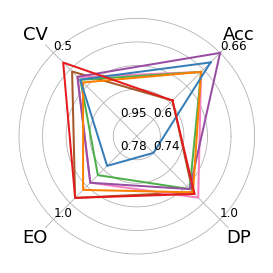

In [707]:
build_radar(ens_results_cv, include_legend=False, acc_min=acc_min_aux, acc_max=acc_max_aux,
            eo_min=eo_min_aux, eo_max=eo_max_aux, dp_min=dp_min_aux, dp_max=dp_max_aux,
            cv_min=cv_min_aux, cv_max=cv_max_aux)

In [708]:
# Gerar ensembles em teste:
ens_results_test = pd.DataFrame(index=[method for method in methods], columns=metrics)

# Ensemble MooErro
ind_moo_err_min = len(other_models['Acurácia'])
models_moo_err = [("Model "+str(idx), moo_model.x) 
            for idx, moo_model in enumerate(moo_err.solutionsList)
            if ind_moo_err_min+idx in selected_idx]

if len(models_moo_err) > 0:
    ensemble_moo_err = SimpleVoting(estimators=models_moo_err, voting='soft', minimax=False)
    ens_results_test.loc['MOOErro',:] = calc_res_test(ensemble_moo_err)

# Ensemble MooAcep
ind_moo_acep_min = ind_moo_err_min+len(m_metrics['Acurácia'])
models_moo_acep = [("Model "+str(idx), moo_model.x) 
            for idx, moo_model in enumerate(moo_prob.solutionsList)
            if ind_moo_acep_min+idx in selected_idx]

if len(models_moo_acep) > 0:
    ensemble_moo_acep = SimpleVoting(estimators=models_moo_acep, voting='soft', minimax=False)
    ens_results_test.loc['MOOAcep',:] = calc_res_test(ensemble_moo_acep)

idx_log = len(metrics_adult_min_aux["Acurácia"])
idx_rew = idx_log + len(metrics_adult_log_aux["Acurácia"])
idx_par = idx_rew + len(metrics_adult_rew_aux["Acurácia"])
idx_eq = idx_par + len(metrics_adult_pp_aux["Acurácia"])
idx_min = {'Minimax': 0, 'LogReg': idx_log, 'Reweight': idx_rew, 'ParDem': idx_par, 'EqOp':idx_eq}

# Ensemble Outros
for est in ['LogReg', 'Reweight', 'ParDem', 'EqOp','Minimax']:
    models_est = [("Model "+str(idx), model) 
                for idx, model in other_solutions_list[est]
                if idx_min[est]+idx in selected_idx]

    if len(models_est) > 0:
        if est == 'Minimax':
            ensemble_est = SimpleVoting(estimators=models_est, voting='soft', minimax=True)
        else:
            ensemble_est = SimpleVoting(estimators=models_est, voting='soft', minimax=False)
        ens_results_test.loc[est,:] = calc_res_test(ensemble_est)

ens_results_test

,Acurácia,Coeficiente de variação,Igualdade de Oportunidade,P porcento
Minimax,0.615385,0.540597,0.964706,0.991549
LogReg,0.625,0.642149,0.907012,0.964006
Reweight,0.634615,0.641957,0.907012,0.946792
ParDem,0.634615,0.641957,0.995122,0.998918
EqOp,0.625,0.661324,0.96748,0.983207
MOOErro,0.634615,0.660973,0.76161,0.765794
MOOAcep,0.596154,0.559883,0.926829,0.859155


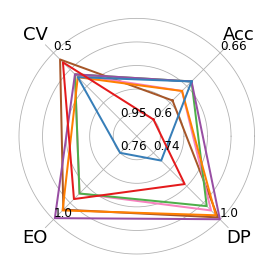

In [709]:
build_radar(ens_results_test, include_legend=False, acc_min=acc_min_aux, acc_max=acc_max_aux,
            eo_min=eo_min_aux, eo_max=eo_max_aux, dp_min=dp_min_aux, dp_max=dp_max_aux,
            cv_min=cv_min_aux, cv_max=cv_max_aux)

In [710]:
all_models.drop(['index'], axis = 1).to_csv("AllModelsResults-German.csv", index=False)